# En este ejercicio vamos a visualizar un árbol de decisión#
 
De entre los algoritmos clasificadores, el árbol de decisión se usa principalmente, porque da explicaciones sencillas sobre como clasifica.

Vamos a generar un modelo árbol de decisión, y luego generaremos un grafo en formato graphviz https://www.graphviz.org/, con la explicación de como clasifica.


In [1]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import html5lib
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn                  import svm ,  metrics
from sklearn.metrics        import mean_squared_error

#df = pd.read_html("http://www.mundodeportivo.com/resultados/futbol/laliga/clasificacion.html")[0]

df = pd.read_csv("datasets/equipos.csv")



/Users/jaimevalero/miniconda3/envs/flask/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df["Resultado"]   =  "Zona fria"
df["Resultado"].iloc[4:6]     = "Europa League"
df["Resultado"].iloc[0:4]     = "Champions League"
df["Resultado"].iloc[16:20]   = "Descenso"
df["Resultado"].iloc[6:16]    = "Zona fria"


In [3]:
# Quitamos la info innecesaria
del df["Equipo"]
df

,PJ,PG,PE,PP,GF,GC,DIF,PTS,Resultado
0,36,27,9,0,94,24,70,90,Champions League
1,36,22,9,5,55,20,35,75,Champions League
2,36,21,9,6,86,42,44,72,Champions League
3,36,20,7,9,62,37,25,67,Champions League
4,36,18,5,13,56,56,0,59,Europa League
5,36,17,6,13,51,46,5,57,Europa League
6,36,16,6,14,46,56,-10,54,Zona fria
7,36,14,10,12,41,32,9,52,Zona fria
8,36,13,9,14,48,57,-9,48,Zona fria
9,36,13,8,15,41,48,-7,47,Zona fria


In [4]:
## Hacemos el split en train/test como en otras ocasiones ##

In [5]:
import pandas as pd
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error


LABELS =  ['PG','PE','PP','GF','GC','DIF','PTS']
CLASSES = ["Champions League", "Descenso" , "Europa League", "Zona fria"]


X =  df[LABELS]
y =  df['Resultado']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)






## Generamos el arbol de decision ##


In [6]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## Generamos el grafo en formato graphviz, y la imagen derivada.##


El grafo generado en graphviz es : 
 digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="PTS <= 45.0\ngini = 0.684\nsamples = 15\nvalue = [3, 3, 2, 7]\nclass = Zona fria", fillcolor="#d739e555"] ;
1 [label="DIF <= -15.0\ngini = 0.42\nsamples = 10\nvalue = [0, 3, 0, 7]\nclass = Zona fria", fillcolor="#d739e592"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0]\nclass = Descenso", fillcolor="#47e539ff"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 7]\nclass = Zona fria", fillcolor="#d739e5ff"] ;
1 -> 3 ;
4 [label="PP <= 9.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0]\nclass = Champions League", fillcolor="#e5813955"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]\nclass = Champions League", fillcolor="#e58139ff"] ;
4 -> 5 ;
6 [label="gini = 0.

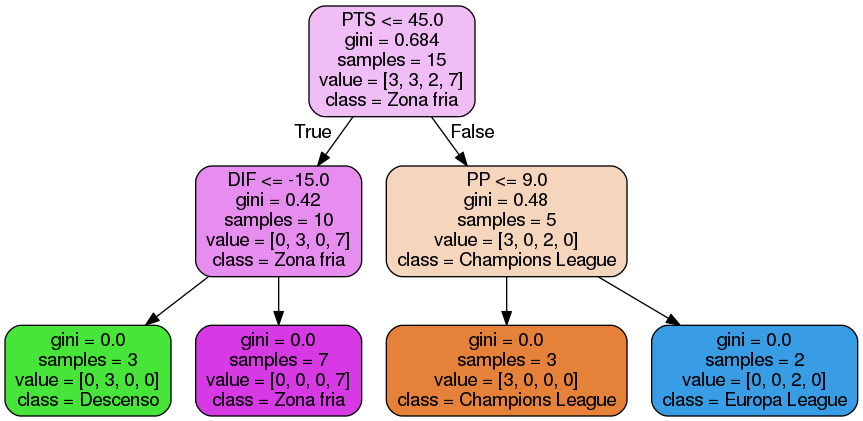

In [7]:

from IPython.display import Image
from pydotplus    import graph_from_dot_data
from sklearn.tree import export_graphviz

# Generamos el grafo en texto
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=CLASSES,
                           feature_names= LABELS ,
                           out_file=None) 
print ("El grafo generado en graphviz es : \n",  dot_data)
graph = graph_from_dot_data(dot_data) 

# Generamos la imagen
graph.write_png('tree1-graphviz.png') 
Image(filename='tree1-graphviz.png', width=600) 